In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('Iteration4').getOrCreate()
from pyspark.ml.classification import LogisticRegression

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/12 05:02:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv('./diabetes_binary.csv', inferSchema=True,header=True)

##### 2.2 Describe the data 

In [3]:
df.printSchema()

print("Total Number of Rows:", df.count())

root
 |-- id: integer (nullable = true)
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)

Total Number of Rows: 70692


##### 2.3 Data Exploration

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_data = df.toPandas()

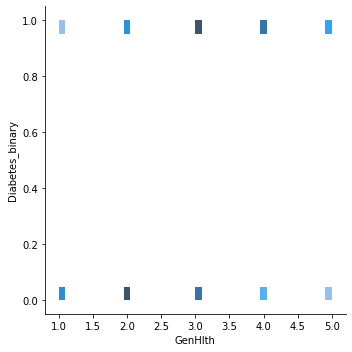

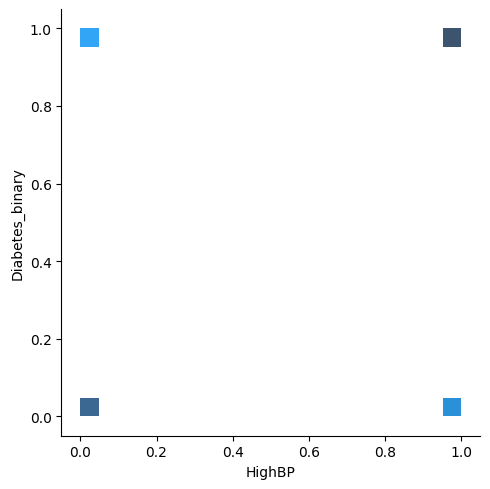

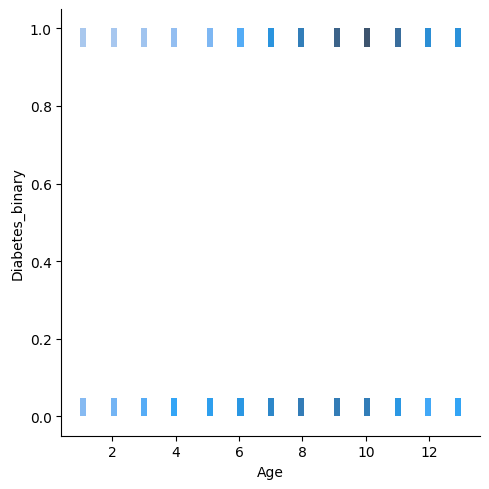

In [5]:
sns.displot(data=pandas_data, x="GenHlth", y="Diabetes_binary")
sns.displot(data=pandas_data, x="HighBP", y="Diabetes_binary")
sns.displot(data=pandas_data, x="Age", y="Diabetes_binary")

##### 2.4 Verify the data quality

<AxesSubplot:xlabel='Age', ylabel='BMI'>

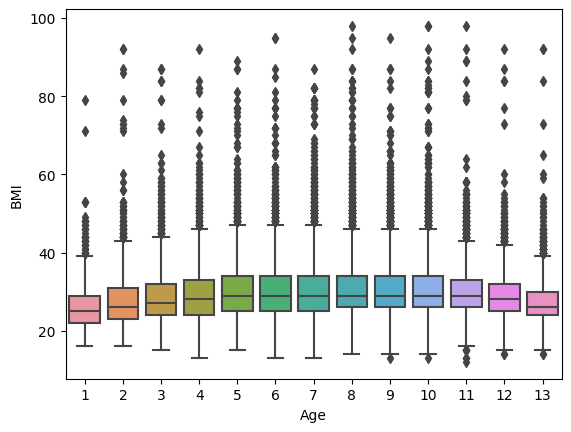

In [6]:
sns.boxplot(data=pandas_data, x="Age",y="BMI")

<AxesSubplot:xlabel='PhysHlth'>

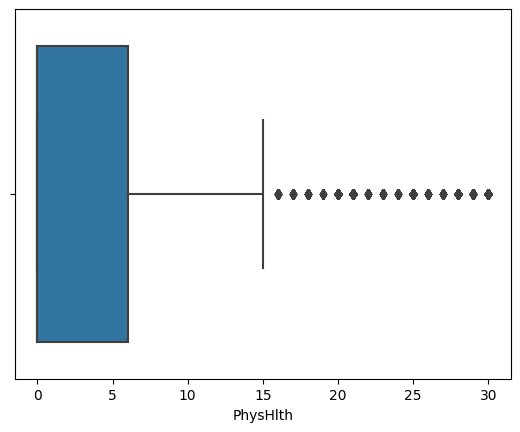

In [7]:
sns.boxplot(data=pandas_data, x="PhysHlth")

<AxesSubplot:xlabel='MentHlth'>

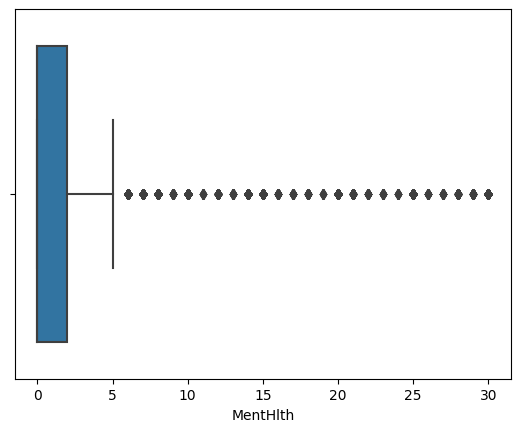

In [8]:
sns.boxplot(data=pandas_data, x="MentHlth")

In [9]:
from pyspark.sql.functions import *

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show(vertical = True)

-RECORD 0-------------------
 id                   | 0   
 Diabetes_binary      | 0   
 HighBP               | 0   
 HighChol             | 0   
 CholCheck            | 0   
 BMI                  | 0   
 Smoker               | 0   
 Stroke               | 0   
 HeartDiseaseorAttack | 0   
 PhysActivity         | 0   
 Fruits               | 0   
 Veggies              | 0   
 HvyAlcoholConsump    | 0   
 AnyHealthcare        | 0   
 NoDocbcCost          | 0   
 GenHlth              | 0   
 MentHlth             | 0   
 PhysHlth             | 0   
 DiffWalk             | 0   
 Sex                  | 0   
 Age                  | 0   
 Education            | 0   
 Income               | 4   



##### 3.1 Data Selection

In [10]:
df.createOrReplaceTempView('new_data')
new_data = spark.sql("SELECT * FROM new_data")
new_data.show(1,vertical =True)
print("Total Number of Rows:", new_data.count())

-RECORD 0-------------------
 id                   | 1   
 Diabetes_binary      | 0   
 HighBP               | 1   
 HighChol             | 0   
 CholCheck            | 1   
 BMI                  | 26  
 Smoker               | 0   
 Stroke               | 0   
 HeartDiseaseorAttack | 0   
 PhysActivity         | 1   
 Fruits               | 0   
 Veggies              | 1   
 HvyAlcoholConsump    | 0   
 AnyHealthcare        | 1   
 NoDocbcCost          | 0   
 GenHlth              | 3   
 MentHlth             | 5   
 PhysHlth             | 30  
 DiffWalk             | 0   
 Sex                  | 1   
 Age                  | 4   
 Education            | 6   
 Income               | 8   
only showing top 1 row

Total Number of Rows: 70692


In [11]:
selected_data=new_data.drop("Education","Income","Veggies","Fruits","Smoker","Stroke","NoDocbcCost")

selected_data.show(1, vertical = True)
print("Total Number of Columns:", len(selected_data.columns))

-RECORD 0-------------------
 id                   | 1   
 Diabetes_binary      | 0   
 HighBP               | 1   
 HighChol             | 0   
 CholCheck            | 1   
 BMI                  | 26  
 HeartDiseaseorAttack | 0   
 PhysActivity         | 1   
 HvyAlcoholConsump    | 0   
 AnyHealthcare        | 1   
 GenHlth              | 3   
 MentHlth             | 5   
 PhysHlth             | 30  
 DiffWalk             | 0   
 Sex                  | 1   
 Age                  | 4   
only showing top 1 row

Total Number of Columns: 16


##### 3.5 Formatting Data

In [12]:
selected_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)



In [41]:
import pandas as pd
from pyspark.sql.functions import col 

for c in selected_columns:
    format_data = selected_data.withColumn("Sex" ,selected_data["Sex"] .cast("binary"))
    
format_data.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: binary (nullable = true)
 |-- Age: integer (nullable = true)



In [14]:
format_data.show(1, vertical = True)
format_data.describe().show(vertical = True)

-RECORD 0-----------------------------
 id                   | 1             
 Diabetes_binary      | 0             
 HighBP               | 1             
 HighChol             | 0             
 CholCheck            | 1             
 BMI                  | 26            
 HeartDiseaseorAttack | 0             
 PhysActivity         | 1             
 HvyAlcoholConsump    | 0             
 AnyHealthcare        | 1             
 GenHlth              | 3             
 MentHlth             | 5             
 PhysHlth             | 30            
 DiffWalk             | 0             
 Sex                  | [00 00 00 01] 
 Age                  | 4             
only showing top 1 row



-RECORD 0-----------------------------------
 summary              | count               
 id                   | 70692               
 Diabetes_binary      | 70692               
 HighBP               | 70692               
 HighChol             | 70692               
 CholCheck            | 70692               
 BMI                  | 70692               
 HeartDiseaseorAttack | 70692               
 PhysActivity         | 70692               
 HvyAlcoholConsump    | 70692               
 AnyHealthcare        | 70692               
 GenHlth              | 70692               
 MentHlth             | 70692               
 PhysHlth             | 70692               
 DiffWalk             | 70692               
 Age                  | 70692               
-RECORD 1-----------------------------------
 summary              | mean                
 id                   | 35346.5             
 Diabetes_binary      | 0.5                 
 HighBP               | 0.5634583828438862  
 HighChol 

##### 3.2 Cleaning data

In [15]:
check_outlier_columns = ["BMI"]
bounds = {}

for c in check_outlier_columns: 
    quantile = selected_data.approxQuantile(c, [0.25, 0.75],0.1)
    IQR = quantile[1] - quantile[0]
    bounds[c] = [quantile[0] - 1.5 * IQR,quantile[1] + 1.5 * IQR]
    
print(bounds)

{'BMI': [16.0, 40.0]}


In [16]:
outliers = selected_data.select(*["id"]+[((selected_data[c] < bounds[c][0]) |(selected_data[c]>bounds[c][1])).alias(c+"_status") 
                                          for c in check_outlier_columns])
outliers.show(100)

join_status = selected_data.join(outliers, on='id')
BMI_outliers = join_status.filter("BMI_status").count()

print("Total Number of Outliers:",BMI_outliers)

+---+----------+
| id|BMI_status|
+---+----------+
|  1|     false|
|  2|     false|
|  3|     false|
|  4|     false|
|  5|     false|
|  6|     false|
|  7|     false|
|  8|     false|
|  9|     false|
| 10|     false|
| 11|     false|
| 12|     false|
| 13|     false|
| 14|      true|
| 15|     false|
| 16|     false|
| 17|     false|
| 18|     false|
| 19|     false|
| 20|     false|
| 21|     false|
| 22|     false|
| 23|     false|
| 24|     false|
| 25|     false|
| 26|     false|
| 27|     false|
| 28|     false|
| 29|     false|
| 30|     false|
| 31|     false|
| 32|     false|
| 33|     false|
| 34|     false|
| 35|     false|
| 36|     false|
| 37|     false|
| 38|     false|
| 39|     false|
| 40|     false|
| 41|     false|
| 42|     false|
| 43|      true|
| 44|     false|
| 45|     false|
| 46|     false|
| 47|     false|
| 48|     false|
| 49|     false|
| 50|     false|
| 51|     false|
| 52|     false|
| 53|     false|
| 54|     false|
| 55|     false|
| 56|     fals

In [17]:
cleaned_data = join_status.filter(~join_status["BMI_status"])

number_of_outliers = cleaned_data.filter("BMI_status").count()

print("Total Number of Outliers:",number_of_outliers)
print("Total Number of Rows:", cleaned_data.count())
print("Total Number of Columns:", len(cleaned_data.columns))

Total Number of Outliers: 0
Total Number of Rows: 65584
Total Number of Columns: 17


In [18]:
cleaned_data.show(1, vertical = True)

-RECORD 0---------------------
 id                   | 1     
 Diabetes_binary      | 0     
 HighBP               | 1     
 HighChol             | 0     
 CholCheck            | 1     
 BMI                  | 26    
 HeartDiseaseorAttack | 0     
 PhysActivity         | 1     
 HvyAlcoholConsump    | 0     
 AnyHealthcare        | 1     
 GenHlth              | 3     
 MentHlth             | 5     
 PhysHlth             | 30    
 DiffWalk             | 0     
 Sex                  | 1     
 Age                  | 4     
 BMI_status           | false 
only showing top 1 row



#### 3.3 Construct the data

In [19]:
import pyspark.sql.functions as function

def GenHlth_level(decile_rank):
    if decile_rank <= 2:
        return 'Good'
    elif decile_rank > 2 and decile_rank <= 3:
        return 'Fair'
    else:
        return 'Poor'
GenHlth_level_udf  = function.udf(GenHlth_level,"string")
constructed_data = cleaned_data.withColumn("GenHlth_level",GenHlth_level_udf("GenHlth"))

constructed_data.show(1,vertical =True)
print("Total Number of Rows:", constructed_data.count())

-RECORD 0---------------------
 id                   | 1     
 Diabetes_binary      | 0     
 HighBP               | 1     
 HighChol             | 0     
 CholCheck            | 1     
 BMI                  | 26    
 HeartDiseaseorAttack | 0     
 PhysActivity         | 1     
 HvyAlcoholConsump    | 0     
 AnyHealthcare        | 1     
 GenHlth              | 3     
 MentHlth             | 5     
 PhysHlth             | 30    
 DiffWalk             | 0     
 Sex                  | 1     
 Age                  | 4     
 BMI_status           | false 
 GenHlth_level        | Fair  
only showing top 1 row

Total Number of Rows: 65584


%%html
<style>
div.output_area pre {
    white-space: pre;
}

In [20]:
constructed_data.show()

+---+---------------+------+--------+---------+---+--------------------+------------+-----------------+-------------+-------+--------+--------+--------+---+---+----------+-------------+
| id|Diabetes_binary|HighBP|HighChol|CholCheck|BMI|HeartDiseaseorAttack|PhysActivity|HvyAlcoholConsump|AnyHealthcare|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|BMI_status|GenHlth_level|
+---+---------------+------+--------+---------+---+--------------------+------------+-----------------+-------------+-------+--------+--------+--------+---+---+----------+-------------+
|  1|              0|     1|       0|        1| 26|                   0|           1|                0|            1|      3|       5|      30|       0|  1|  4|     false|         Fair|
|  2|              0|     1|       1|        1| 26|                   0|           0|                0|            1|      3|       0|       0|       0|  1| 12|     false|         Fair|
|  3|              0|     0|       0|        1| 26|                   

In [21]:
for attributes, dtype in constructed_data.dtypes:
    print(attributes, dtype)
    
print("Total Number of Rows:", constructed_data.count())

id int
Diabetes_binary int
HighBP int
HighChol int
CholCheck int
BMI int
HeartDiseaseorAttack int
PhysActivity int
HvyAlcoholConsump int
AnyHealthcare int
GenHlth int
MentHlth int
PhysHlth int
DiffWalk int
Sex int
Age int
BMI_status boolean
GenHlth_level string
Total Number of Rows: 65584


#### 3.4 Integrate various data sources

In [22]:
    from pyspark.sql import SparkSession
    from pyspark.sql.types import *
    
aDF = spark.read.csv('./a.csv', inferSchema=True, header=True)
bDF = spark.read.csv('./b.csv', inferSchema=True, header=True)

inner_joinDf = aDF.join(bDF, aDF.id == bDF.id, how= "inner")
    inner_joinDf.show()
    
print("Total Number of Rows:", inner_joinDf.count())
print("Total Number of Columns:", len(inner_joinDf.columns))

+---+---------------+------+--------+---------+---+------+------+--------------------+------------+---+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
| id|Diabetes_binary|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity| id|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+---+---------------+------+--------+---------+---+------+------+--------------------+------------+---+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|  1|              0|     1|       0|        1| 26|     0|     0|                   0|           1|  1|     0|      1|                0|            1|          0|      3|       5|      30|       0|  1|  4|        6|     8|
|  2|              0|     1|       1|        1| 26|     1|     1|                   0|           0|  2|     

#### 4.1 Data Reduction

In [23]:
constructed_data.show(1,vertical =True)
print("Total Number of Rows:", constructed_data.count())

-RECORD 0---------------------
 id                   | 1     
 Diabetes_binary      | 0     
 HighBP               | 1     
 HighChol             | 0     
 CholCheck            | 1     
 BMI                  | 26    
 HeartDiseaseorAttack | 0     
 PhysActivity         | 1     
 HvyAlcoholConsump    | 0     
 AnyHealthcare        | 1     
 GenHlth              | 3     
 MentHlth             | 5     
 PhysHlth             | 30    
 DiffWalk             | 0     
 Sex                  | 1     
 Age                  | 4     
 BMI_status           | false 
 GenHlth_level        | Fair  
only showing top 1 row

Total Number of Rows: 65584


In [24]:
low_corr = (constructed_data.stat.corr('Diabetes_binary','MentHlth'),
            constructed_data.stat.corr('Diabetes_binary','Sex'),
            constructed_data.stat.corr('Diabetes_binary','HvyAlcoholConsump'),
           constructed_data.stat.corr('Diabetes_binary','AnyHealthcare'))

print(low_corr)

(0.07489508167237939, 0.05710891533471476, -0.09257717515399254, 0.02509307194766022)


In [25]:
high_corr = (constructed_data.stat.corr('Diabetes_binary','HighBP'),
            constructed_data.stat.corr('Diabetes_binary','BMI'),
            constructed_data.stat.corr('Diabetes_binary','GenHlth'))

print(high_corr)

(0.3766313796707988, 0.30021639604768136, 0.39954403785929704)


In [26]:
reduced_data = constructed_data.select('Diabetes_binary','HighBP','HighChol','CholCheck','BMI','HeartDiseaseorAttack','PhysActivity','GenHlth','PhysHlth','DiffWalk','Age','GenHlth_level')

reduced_data.show(1,vertical =True)
print("Total Number of Rows:", reduced_data.count())
print("Total Number of Columns:", len(reduced_data.columns))
reduced_data.printSchema()

-RECORD 0--------------------
 Diabetes_binary      | 0    
 HighBP               | 1    
 HighChol             | 0    
 CholCheck            | 1    
 BMI                  | 26   
 HeartDiseaseorAttack | 0    
 PhysActivity         | 1    
 GenHlth              | 3    
 PhysHlth             | 30   
 DiffWalk             | 0    
 Age                  | 4    
 GenHlth_level        | Fair 
only showing top 1 row

Total Number of Rows: 65584
Total Number of Columns: 12
root
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- GenHlth_level: string (nullable = true)



#### 6.1 Data Exploratory 

In [30]:
from pyspark.ml.feature import RFormula

rformula = RFormula(formula = "Diabetes_binary~.", featuresCol = "features",labelCol = "pearson")
rf_model = rformula.fit(reduced_data).transform(reduced_data)
formatted = rf_model.select("features","label")
formatted.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[1.0,0.0,1.0,26.0...|  0.0|
|[1.0,1.0,1.0,26.0...|  0.0|
|[0.0,0.0,1.0,26.0...|  0.0|
|[1.0,1.0,1.0,28.0...|  0.0|
|(12,[2,3,5,6,9,10...|  0.0|
|(12,[2,3,5,6,9,10...|  0.0|
|[0.0,1.0,1.0,26.0...|  0.0|
|(12,[2,3,6,9],[1....|  0.0|
|(12,[2,3,5,6,9,11...|  0.0|
|(12,[2,3,6,7,9,11...|  0.0|
|[1.0,1.0,1.0,24.0...|  0.0|
|(12,[2,3,5,6,9,10...|  0.0|
|[1.0,1.0,1.0,27.0...|  0.0|
|[0.0,1.0,1.0,29.0...|  0.0|
|(12,[2,3,5,6,9,11...|  0.0|
|(12,[2,3,5,6,9,10...|  0.0|
|(12,[2,3,5,6,9,10...|  0.0|
|(12,[2,3,5,6,9,10...|  0.0|
|[1.0,0.0,1.0,26.0...|  0.0|
|(12,[2,3,5,6,9,10...|  0.0|
+--------------------+-----+
only showing top 20 rows



In [40]:
from pyspark.ml.stat import Correlation
corr_mat = Correlation.corr(formatted,"features","pearson").collect()[0][0]
print(str(corr_mat))


DenseMatrix([[ 1.        ,  0.31932957,  0.10130105,  0.25488772,  0.21341857,
              -0.12932956,  0.31534406,  0.1665821 ,  0.22289347,  0.35199673,
              -0.28658742,  0.0920141 ],
             [ 0.31932957,  1.        ,  0.08699765,  0.15463223,  0.18346382,
              -0.08897217,  0.23777896,  0.13807609,  0.15655156,  0.24910515,
              -0.21105465,  0.062298  ],
             [ 0.10130105,  0.08699765,  1.        ,  0.05162749,  0.04471646,
              -0.00648427,  0.05889714,  0.03301051,  0.04212984,  0.1031515 ,
              -0.05408916,  0.01829213],
             [ 0.25488772,  0.15463223,  0.05162749,  1.        ,  0.0708437 ,
              -0.13886173,  0.23433002,  0.10483732,  0.18057484,  0.01361016,
              -0.23071431,  0.11080369],
             [ 0.21341857,  0.18346382,  0.04471646,  0.0708437 ,  1.        ,
              -0.09723579,  0.27912451,  0.1982486 ,  0.23613052,  0.22626683,
              -0.21115884, -0.0114861 ],
     

#####logistic

In [ ]:
from pyspark.ml.classification import RandomForestClassifier as rfc

config = rfc(numTrees = 30,maxDepth = 15, labelCol = "label", seed = 11)
result = config.fit(formatted)

importance = result.featureImportances
importanceList=[float(c) for c in  importance]

column_list = reduce_data.columns
score=dict(zip(column_list,importanceList))
print(score)